In [0]:
# !pip install torch==0.3.1 torchvision==0.2.0
# !git clone https://github.com/bailvwangzi/repulsion_loss_ssd.git
# !sh repulsion_loss_ssd/data/scripts/VOC2007.sh
# !sh repulsion_loss_ssd/data/scripts/VOC2012.sh
# !mkdir -p repulsion_loss_ssd/weights
# %cd repulsion_loss_ssd/weights
# !wget https://s3.amazonaws.com/amdegroot-models/vgg16_reducedfc.pth
# %cd ..
# !python train.py --cuda true

# Setup the required files


1.   Syncs files from Gooogle Drive
2.   Unzips the required data



In [0]:
'''
DON'T RUN THIS CELL WITH ANY OTHER CELLS. 
IT WILL REQUEST ACCESS TO YOUR DRIVE AND WILL REQUIRE THE DATASET TO BE PRESENT ON YOUR DRIVE.
'''
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
!pip install torch==0.3.1 torchvision==0.2.0
%cd /content/drive/My\ Drive/repulsion_loss_ssd

!mkdir -p ~/data
!cp -f /content/drive/My\ Drive/VOC/VOCdevkit.zip ~/data/
!unzip -q ~/data/VOCdevkit.zip -d ~/data/
!rm ~/data/VOCdevkit.zip

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
     |████████████████████████████████| 496.4MB 32kB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
ERROR: fastai 1.0.58 has requirement torch>=1.0.0, but you'll have torch 0.3.1 which is incompatible.
  Found existing installation: torch 1.3.0+cu100
    Uninstalling torch-1.3.0+cu100:
      Successfully uninstalled torch-1.3.0+cu100
  Found existing installation: torchvision 0.4.1+cu100
    Uninstalling torchvision-0.4.1+cu100:
      Successfully un

# Training

Fetches the latest weights and resumes training from checkpoint

In [0]:
import subprocess
x = subprocess.check_output('ls weights/', shell=True).decode().strip().split('\n')
if len(x) == 1:
  !python train.py --cuda True
else:
  d = {int(y.split('_')[2].split('.')[0]): y for y in x[:-1]}
  i = max(d.keys()) + 1
  f = 'weights/' + d[i - 1]
  !python train.py --cuda True --resume $f --start_iter $i --lr 1e-5

# Testing

Test the model with weights attained after training

In [0]:
!python test.py --cuda True --trained_model weights/VOC.pth

# Eval

Evaluate the model with weights attained after training

In [0]:
!python eval.py --trained_model weights/ssd300_mAP_77.43_v2.pth --cuda True

# Prediction

Classifies and generates bounding boxes for the objects identified in the sample image

003534 1 0.9721181988716125 136.90944 133.48587 438.10452 334.06958 1 0.6900539994239807 -1.4991164 59.383564 130.25677 263.0359 14 0.9146672487258911 254.15833 9.64201 482.25803 333.01218 14 0.7797533869743347 182.62288 -7.718089 394.45578 261.89865 14 0.7194674015045166 -0.59206784 -3.577198 119.11735 237.46785 

003534.jpg


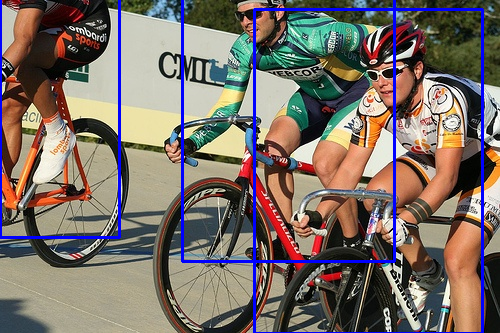

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# 000124
img_count = '003534'
with open('eval/pred.txt', 'r+') as f:
  s = f.readlines()
  for i in range(len(s)):
    if s[i].split(' ')[0] == img_count:
      s = s[i]
      break
  print(s)
  s = s.strip().split(' ')
  img_name = s.pop(0) + '.jpg'
  print(img_name)
  x1 = [] 
  y1 = []
  x2 = [] 
  y2 = []
  while s:
    a = s.pop(0)
    s.pop(0)
    x1.append(int(float(s.pop(0))))
    y1.append(int(float(s.pop(0))))
    x2.append(int(float(s.pop(0))))
    y2.append(int(float(s.pop(0))))
    if a != '14':
      x1.pop()
      y1.pop()
      x2.pop()
      y2.pop()
   
  img = cv2.imread('/root/data/VOCdevkit/VOC2007/JPEGImages/' + img_name)
  for i in range(len(x1)):
    img = cv2.rectangle(img, (x1[i], y1[i]), (x2[i], y2[i]), (255, 0, 0), 2)
  # cv2_imshow(img)
  cv2_imshow(img)

# Ground Truth

Fetches ground truth and generates bounding boxes for the objects in the sample image

['273.0', '186.0', '499.0', '332.0', '1', '152.0', '114.0', '415.0', '332.0', '1', '0.0', '71.0', '131.0', '271.0', '1', '293.0', '21.0', '499.0', '332.0', '14', '160.0', '0.0', '388.0', '268.0', '14', '0.0', '0.0', '113.0', '181.0', '14']
003534.jpg


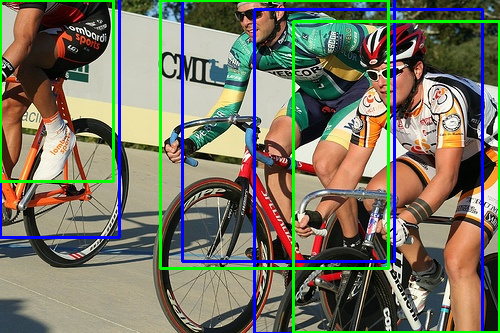

In [0]:
with open('eval/gt.txt', 'r+') as f:
  s = f.readlines()
  for i in range(len(s)):
    if s[i].split(' ')[0] == img_count:
      s = s[i]
      break
  s = s.strip().split(' ')
  img_name = s.pop(0) + '.jpg'
  print(s)
  print(img_name)
  x1 = [] 
  y1 = []
  x2 = [] 
  y2 = []
  while s:
    x1.append(int(float(s.pop(0))))
    y1.append(int(float(s.pop(0))))
    x2.append(int(float(s.pop(0))))
    y2.append(int(float(s.pop(0))))
    a = s.pop(0)
    if a != '14':
      x1.pop()
      y1.pop()
      x2.pop()
      y2.pop()
  # img = cv2.imread('/root/data/VOCdevkit/VOC2007/JPEGImages/' + img_name)
  for i in range(len(x1)):
    img = cv2.rectangle(img, (x1[i], y1[i]), (x2[i], y2[i]), (0, 255, 0), 2)
  cv2_imshow(img)

# PR Curve

The metrics used to calculate precision and recall are as follows:
1.   A True positive would have the correct classification with an IoU > 0.5.
2.   A False positive could be possible in two cases where either would have the correct classification with an IoU < 0.5 or a duplicate bounding box for an object already classified.
3.A False negative prediction would have an IoU > 0.5 but the wrong classification.




['detections.pkl', 'aeroplane_pr.pkl', 'bicycle_pr.pkl', 'bird_pr.pkl', 'boat_pr.pkl', 'bottle_pr.pkl', 'bus_pr.pkl', 'car_pr.pkl', 'cat_pr.pkl', 'diningtable_pr.pkl', 'chair_pr.pkl', 'dog_pr.pkl', 'cow_pr.pkl', 'horse_pr.pkl', 'person_pr.pkl', 'pottedplant_pr.pkl', 'motorbike_pr.pkl', 'sheep_pr.pkl', 'train_pr.pkl', 'tvmonitor_pr.pkl', 'sofa_pr.pkl']
color is burlywood file is aeroplane_pr.pkl
color is cadetblue file is bicycle_pr.pkl
color is chartreuse file is bird_pr.pkl
color is chocolate file is boat_pr.pkl
color is coral file is bottle_pr.pkl
color is cornflowerblue file is bus_pr.pkl
color is cornsilk file is car_pr.pkl
color is crimson file is cat_pr.pkl
color is cyan file is diningtable_pr.pkl
color is darkblue file is chair_pr.pkl
color is darkcyan file is dog_pr.pkl
color is darkgoldenrod file is cow_pr.pkl
color is darkgray file is horse_pr.pkl
color is darkgreen file is person_pr.pkl
color is darkgrey file is pottedplant_pr.pkl
color is darkkhaki file is motorbike_pr.pkl


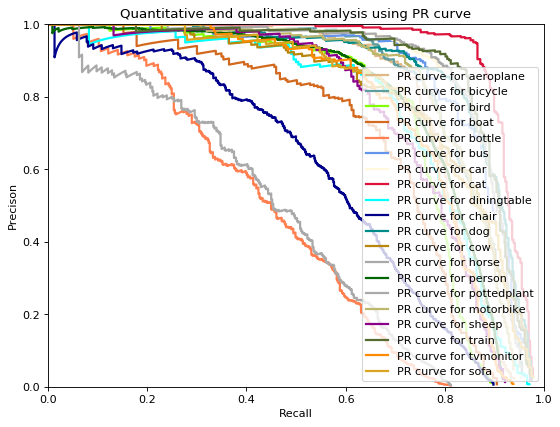

In [0]:
%matplotlib inline
import pickle
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

mypath = './ssd300_120000/test/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(onlyfiles)
colors = ['brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'goldenrod', 'gray', 'yellow']

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
for i, file in enumerate(onlyfiles):
  with open(mypath + file, 'rb') as filehandle:
      # read the data as binary data stream
      if file != 'detections.pkl':
        print("color is", colors[i], "file is", file)
        metrics = pickle.load(filehandle)
        rec = metrics['rec']
        prec = metrics['prec']
        lw = 2
        plt.plot(rec, prec, color=colors[i],
                 lw=lw, label='PR curve for ' + file.split('_')[0])
        # print(pickle.load(filehandle)) 

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precison')
plt.title('Quantitative and qualitative analysis using PR curve')
plt.legend(loc="lower right")
# plt.axis([0.0,0.1,0.0,1.0])
plt.show()

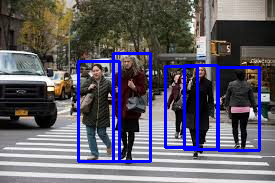

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
from torch.autograd import Variable
from data import VOC_ROOT, VOCAnnotationTransform, VOCDetection, BaseTransform
from data import VOC_CLASSES as labelmap
import torch.utils.data as data

from ssd import build_ssd

import sys
import os
import time
import argparse
import numpy as np
import pickle
import cv2

torch.set_default_tensor_type('torch.cuda.FloatTensor')
net = build_ssd('test', 300, 21)            # initialize SSD
net.load_state_dict(torch.load('/content/drive/My Drive/repulsion_loss_ssd/weights/ssd300_mAP_77.43_v2.pth'))
net.eval()
net = net.cuda()
cudnn.benchmark = True
# img_name = '/root/data/VOCdevkit/VOC2007/JPEGImages/000124.jpg'
img_path = '/content/drive/My Drive/repulsion_loss_ssd/download.jpeg'
img = cv2.imread(img_path)
height, width, channels = img.shape
transform = BaseTransform(net.size, (104, 117, 123))
im = torch.from_numpy(transform(img)[0]).permute(2, 0, 1)
x = Variable(im.unsqueeze(0))
x = x.cuda()
detections = net(x).data
scale = torch.Tensor([img.shape[1], img.shape[0], img.shape[1], img.shape[0]])
coordinates = list()
for i in range(1, detections.size(1)):
  j = 0
  while detections[0, i, j, 0] >= 0.5:
    score = detections[0, i, j, 0]
    pt = (detections[0, i, j, 1:]*scale).cpu().numpy()
    if i == 15:
      coords = (pt[0], pt[1], pt[2], pt[3])
      coordinates.append(coords)
    j += 1

img = cv2.imread(img_name)
for each in coordinates:
  img = cv2.rectangle(img, (int(each[0]), int(each[1])), (int(each[2]), int(each[3])), (255, 0, 0), 2)
cv2_imshow(img)


In [0]:
from torchvision import models, transforms
from PIL import Image
import torch


In [0]:
torch.set_default_tensor_type('torch.FloatTensor')
vgg = models.vgg16_bn(pretrained=True)
vgg.eval()

img = Image.open(img_path)
transform = transforms.Compose([            #[1]
 transforms.Resize(256),                    #[2]
 transforms.CenterCrop(224),                #[3]
 transforms.ToTensor(),                     #[4]
 transforms.Normalize(                      #[5]
 mean=[0.485, 0.456, 0.406],                #[6]
 std=[0.229, 0.224, 0.225]                  #[7]
 )])
x = Variable(torch.unsqueeze(transform(img), 0))
out = vgg(x)
out

Variable containing:
-1.7272 -2.3139 -2.2811  ...  -4.2498 -0.9083  0.6710
[torch.FloatTensor of size 1x1000]

In [0]:
'''
FASTER RCNN
*** REQUIRES LATEST TORCH. ***
'''


%matplotlib inline
import torchvision
from PIL import Image
from torchvision import transforms as T
import cv2
from google.colab.patches import cv2_imshow

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]
def get_prediction(img_path, threshold):
  img = Image.open(img_path) # Load the image
  transform = T.Compose([T.ToTensor()]) # Defing PyTorch Transform
  img = transform(img) # Apply the transform to the image
  pred = model([img]) # Pass the image to the model
  pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())] # Get the Prediction Score
  pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())] # Bounding boxes
  pred_score = list(pred[0]['scores'].detach().numpy())
  pred_t = [pred_score.index(x) for x in pred_score if x > threshold][-1] # Get list of index with score greater than threshold.
  pred_boxes = pred_boxes[:pred_t+1]
  pred_class = pred_class[:pred_t+1]
  return pred_boxes, pred_class

def object_detection_api(img_path, threshold=0.5, rect_th=3, text_size=3, text_th=3):
  boxes, pred_cls = get_prediction(img_path, threshold) # Get predictions
  img = cv2.imread(img_path) # Read image with cv2
  # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB
  for i in range(len(boxes)):
    if pred_cls[i] == 'person':
      cv2.rectangle(img, boxes[i][0], boxes[i][1],color=(0, 255, 0), thickness=1) # Draw Rectangle with the coordinates
    # cv2.putText(img,pred_cls[i], boxes[i][0],  cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=text_th) # Write the prediction class
  #plt.figure(figsize=(20,30)) # display the output image
  
  cv2_imshow(img)
  # plt.xticks([])
  # plt.yticks([])
  # plt.show()

# img_path = '/content/faster-rcnn.pytorch/data/VOCdevkit2007/VOC2007/JPEGImages/000124.jpg'
img_path = '/content/drive/My Drive/repulsion_loss_ssd/download.jpeg'
img_path = '/content/ped.jpg'
object_detection_api(img_path, 0.5)

AttributeError: ignored